In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [10]:
dataframe = pd.read_csv("dataset/cleaned_data.csv", encoding = "latin-1")

In [11]:
columns = dataframe.columns

In [12]:
columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state',
       '_trusted_judgments', 'verify_relationship',
       'verify_relationship:confidence', 'chemical_id', 'chemical_name',
       'disease_id', 'disease_name', 'form_sentence', 'pmid',
       'relation_pair_id', 'uniq_id'],
      dtype='object')

In [13]:
X = dataframe.loc[:,columns != "verify_relationship"]
Y = dataframe["verify_relationship"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
#confusion matrix heatmap

def heat_map(conf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
        # create heatmap
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [15]:
def conf_matrix(Y_test,y_pred):
    return metrics.confusion_matrix(Y_test,y_pred)

In [16]:
def logistic_regression():
    logreg = LogisticRegression()
    logreg.fit(X_train,Y_train)
    y_pred = logreg.predict(X_test)
    print("The score of model :", logreg.score(X_test,Y_test))
    start = time.time()
    logreg.fit(X_train,Y_train)
    stop = time.time()
    print("Training Time = ", stop - start)
    print(conf_matrix(Y_test,y_pred))
    heat_map(conf_matrix(Y_test,y_pred))
    print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

    print("Precision:",metrics.precision_score(Y_test, y_pred))

    print("Recall:",metrics.recall_score(Y_test, y_pred))
    
    print(classification_report(Y_test, y_pred))




The score of model : 0.8390201224846894
Training Time =  0.030165910720825195
[[ 17 168]
 [ 16 942]]
Accuracy: 0.8390201224846894
Precision: 0.8486486486486486
Recall: 0.9832985386221295
              precision    recall  f1-score   support

           0       0.52      0.09      0.16       185
           1       0.85      0.98      0.91       958

    accuracy                           0.84      1143
   macro avg       0.68      0.54      0.53      1143
weighted avg       0.79      0.84      0.79      1143



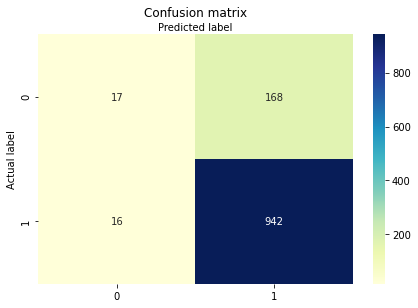

In [18]:
logistic_regression()